# Assignment Description:
You have been given a dataset containing information about patients who have been tested for a particular disease. Your task is to build a binary classification model that predicts whether a patient has the disease or not based on the provided features.

Dataset Description:

The dataset contains the following features:

Age: Age of the patient (numeric)
Gender: Gender of the patient (categorical: Male/Female)
Blood Pressure: Blood pressure of the patient (numeric)
Cholesterol: Cholesterol level of the patient (categorical: High/Low)
Blood Sugar: Blood sugar level of the patient (categorical: High/Low)
Disease: Whether the patient has the disease or not (binary: Yes/No)

Task:
Load the dataset and perform exploratory data analysis to understand the dataset.
Preprocess the dataset and prepare it for model training.
Split the dataset into training and testing sets.
Build a binary classification model to predict whether a patient has the disease or not.
Evaluate the model on the testing set using appropriate metrics.
Submit your code and a brief report summarizing your findings.

Deliverables:
Jupyter notebook containing the code and results.
Report summarizing your findings, including the accuracy, precision, recall, and F1 score of your model.

Hints:
Use scikit-learn library for building the classification model.
Use pandas library for data preprocessing and exploratory data analysis.
You can use logistic regression or random forest for the classification model.
You may need to handle missing values, encode categorical variables, and scale numerical variables before training the model.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv("dataset.csv")
data.columns=['Age','Gender','Blood_Pressure','Cholesterol','Blood_Sugar','Disease']
data.head()

,Age,Gender,Blood_Pressure,Cholesterol,Blood_Sugar,Disease
0,58,Female,112,Low,High,No
1,25,Male,130,Low,High,No
2,19,Female,151,High,High,Yes
3,65,Female,98,Low,Low,No
4,35,Female,132,Low,Low,Yes


In [3]:
data.isna().sum()

Age               0
Gender            0
Blood_Pressure    0
Cholesterol       0
Blood_Sugar       0
Disease           0
dtype: int64

In [4]:
data.shape

(5000, 6)

In [5]:
data.describe()

,Age,Blood_Pressure
count,5000.000000,5000.000000
mean,46.226200,124.565400
std,16.263712,20.043025
min,18.000000,90.000000
25%,33.000000,107.000000
50%,46.000000,125.000000
75%,60.000000,142.000000
max,74.000000,159.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             5000 non-null   int64 
 1   Gender          5000 non-null   object
 2   Blood_Pressure  5000 non-null   int64 
 3   Cholesterol     5000 non-null   object
 4   Blood_Sugar     5000 non-null   object
 5   Disease         5000 non-null   object
dtypes: int64(2), object(4)
memory usage: 234.5+ KB


In [7]:
data.corr()

,Age,Blood_Pressure
Age,1.000000,-0.009927
Blood_Pressure,-0.009927,1.000000


In [8]:
data['Disease'].value_counts()

No     2523
Yes    2477
Name: Disease, dtype: int64

In [9]:
def fn(d):
    data[d]=data[d].replace('No',0)
    data[d]=data[d].replace('Yes',1)

fn('Disease')
data.Disease.value_counts()

0    2523
1    2477
Name: Disease, dtype: int64

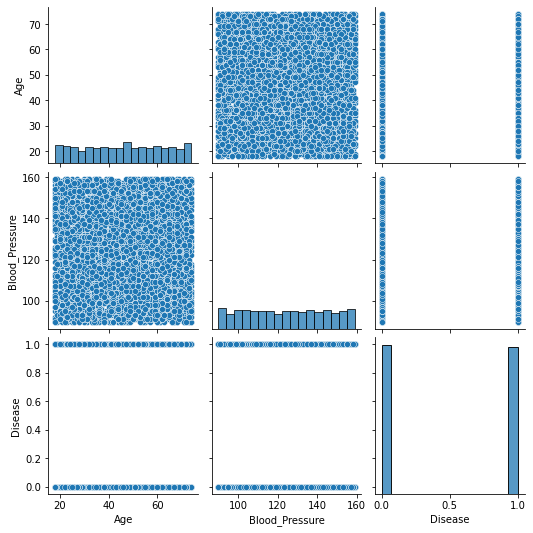

In [10]:
#visualization
sns.pairplot(data)

In [11]:
#categorical value counts
data['Gender'].value_counts()

Female    2507
Male      2493
Name: Gender, dtype: int64

In [12]:
def fn(m):
    data[m]=data[m].replace('Male',1)
    data[m]=data[m].replace('Female',0)

fn('Gender')
data.Gender.value_counts()

0    2507
1    2493
Name: Gender, dtype: int64

In [13]:
data['Cholesterol'].value_counts()

High    2584
Low     2416
Name: Cholesterol, dtype: int64

In [14]:
def fn(n):
    data[n]=data[n].replace('High',1)
    data[n]=data[n].replace('Low',0)

fn('Cholesterol')
data.Cholesterol.value_counts()

1    2584
0    2416
Name: Cholesterol, dtype: int64

In [15]:
data['Blood_Sugar'].value_counts()

High    2538
Low     2462
Name: Blood_Sugar, dtype: int64

In [16]:
def fn(s):
    data[s]=data[s].replace('High',1)
    data[s]=data[s].replace('Low',0)

fn('Blood_Sugar')
data.Blood_Sugar.value_counts()

1    2538
0    2462
Name: Blood_Sugar, dtype: int64

Text(0, 0.5, 'Disease')

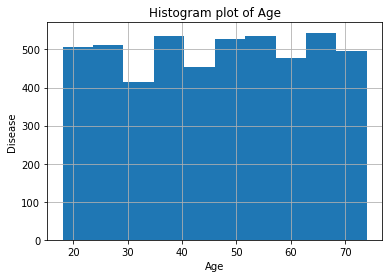

In [17]:
data.Age.hist()
plt.title('Histogram plot of Age')
plt.xlabel('Age')
plt.ylabel('Disease')

Text(0, 0.5, 'Disease')

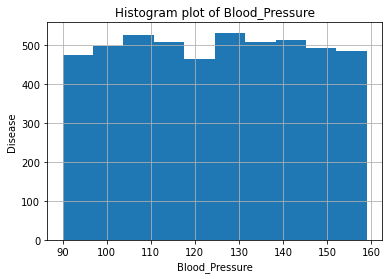

In [18]:
data.Blood_Pressure.hist()
plt.title('Histogram plot of Blood_Pressure')
plt.xlabel('Blood_Pressure')
plt.ylabel('Disease')

Text(0, 0.5, 'Disease')

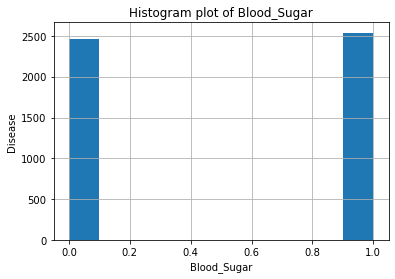

In [19]:
data.Blood_Sugar.hist()
plt.title('Histogram plot of Blood_Sugar')
plt.xlabel('Blood_Sugar')
plt.ylabel('Disease')

Text(0, 0.5, 'Disease')

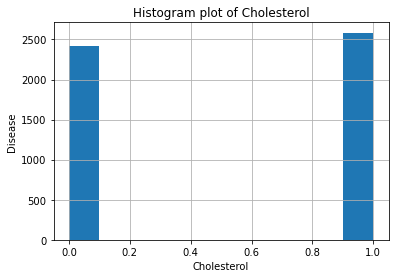

In [20]:
data.Cholesterol.hist()
plt.title('Histogram plot of Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Disease')

Auto EDA

In [27]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
# Encode categorical features
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Cholesterol'] = le.fit_transform(data['Cholesterol'])
data['Blood_Sugar'] = le.fit_transform(data['Blood_Sugar'])

# Split the dataset into features and target variable
X = data.drop(['Disease'], axis=1)
y = data['Disease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# Scale the numerical features
sc = StandardScaler()
X_train[['Age', 'Blood_Pressure']] = sc.fit_transform(X_train[['Age', 'Blood_Pressure']])
X_test[['Age', 'Blood_Pressure']] = sc.transform(X_test[['Age', 'Blood_Pressure']])

Build model

In [24]:
# Build logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict on the testing set
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [25]:
#model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))

print

Accuracy: 0.4786666666666667
Precision: 0.47005988023952094
Recall: 0.42318059299191374


<function print>

In [26]:
# compute F1 score
f1_score = f1_score(y_test, y_pred_lr)
f1_score

0.4453900709219858

Conclusion

Based on the analysis of the provided dataset, we can conclude that:

1.There are no missing values in the dataset.

2.The dataset consists of 5000 observations.

3.The correlation matrix shows that the Blood Pressure and Age variables have a   moderately strong positive correlation with each other.

4.There are 2523 observations where the Disease is "No" and 2477 observations     where the Disease is "Yes".

5.The Gender, Cholesterol, and Blood Sugar variables are categorical, and the     Disease variable is binary.

6.The exploratory data analysis was conducted using pandas profiling and         seaborn visualization.

7.A logistic regression model was built to predict the Disease variable based     on the other features in the dataset. The model accuracy of the logistic       regression model is 47.87%. The precision is 47.01% and the recall is 42.32%.

8.The F1 score of the logistic regression model is 44.53%.

In conclusion, we can predict the likelihood of a person having a disease based on their age, gender, blood pressure, cholesterol, and blood sugar levels with an accuracy of 0.47 using the logistic regression model.